# Proyecto 13 - Gestión Segura de Datos de Clientes

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


Este proyecto te permitirá aplicar prácticas esenciales de privacidad de datos y técnicas de manipulación de datos en un entorno práctico, preparándote para desafíos similares en entornos profesionales.


In [1]:
import pandas as pd
import numpy as np
import uuid
import hashlib
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

1. Cargar los datos de clientes provistos en un archivo CSV.

In [2]:
ruta = r"C:\Users\Francisco\clientes.csv"
data = pd.read_csv(ruta)
data.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.

In [3]:
# Podemos redondear las edades de los clientes:
data['edad'] = (data['edad'] // 10) * 10

In [4]:
# Podemos introducir "Ruido Aleatorio" en los datos de salario:
ruido = np.random.normal(0, 100, size=data['salario'].shape)
data['salario'] += ruido

In [5]:
# Podemos realizar una permutación (shuffling) para las direcciones:
data['direccion'] = np.random.permutation(data["direccion"])

In [6]:
# Visualizamos el DataFrame 'data' con estas modificaciones:
data.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,643 Akhmatova,60,0,61131.059813
1,James Jones,119 Basho,60,1,53848.696631
2,Patricia Wilson,681 Harjo,10,0,60407.321248
3,Elizabeth Robinson,487 Hugo,20,1,42081.015411
4,Charles Brown,773 Hesse,20,1,37483.219091


3. Aplicar técnicas de pseudonimización al campo `nombre`.

In [7]:
# Dado que no sabemos cuál es la finalidad del estudio posterior, vamos a aplicar una tokenización para los nombres de los clientes:

# Definimos un diccionario vacío para almacenar los tokens, y definimos las funciones de tokenización y recuperación de los datos:
token_list = {}

def tokenizar(nombre):
    token = str(uuid.uuid4())
    token_list[token] = nombre
    return token

def recuperar_nombre(token):
    return token_list.get(token, 'Token no encontrado')

# Reemplazar los nombres con tokens:
data["nombre"] = data["nombre"].apply(tokenizar)

# Ver el DataFrame actualizado:
data.head()

,nombre,direccion,edad,categoria,salario
0,e6e33057-5cf2-4046-a2bf-4b26678cacb0,643 Akhmatova,60,0,61131.059813
1,01851172-6f31-4290-865e-4824a9a74b46,119 Basho,60,1,53848.696631
2,72b53a9c-b77b-49d6-a63e-6bd4fb342c85,681 Harjo,10,0,60407.321248
3,edd57ae4-0eff-4d58-ada2-ad4b22814027,487 Hugo,20,1,42081.015411
4,a0356550-240f-49b1-9b7e-153636315d97,773 Hesse,20,1,37483.219091


4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.

In [8]:
# Agrupamos el DataFrame por categoría: 
agrupado = data.groupby('categoria')

# Imprimimos la agrupación para ver las diferencias en las categorías:
for nombre, grupo in agrupado:
    print(nombre, grupo)

0                                    nombre      direccion  edad  categoria  \
0    e6e33057-5cf2-4046-a2bf-4b26678cacb0  643 Akhmatova    60          0   
2    72b53a9c-b77b-49d6-a63e-6bd4fb342c85      681 Harjo    10          0   
7    7cc53774-1e90-4385-8c90-d356b7e16fd5    248 Rimbaud    30          0   
8    61f6c373-8d3d-47d4-9a16-4b2f4119168d      689 Pound    30          0   
9    2216a018-0f5c-479b-a711-6829b2bec9e8    421 Mistral    60          0   
..                                    ...            ...   ...        ...   
189  ee12d100-934f-4b30-839a-63767033cae3      964 Yeats    40          0   
190  4215c3d3-c8f4-40e4-b239-5c012fa1e544  147 Dickinson    30          0   
194  b6fc4abc-bfeb-4bb4-bf1a-00c4a75b8e48   344 Sandburg    40          0   
195  4cb282c6-6a5f-40d0-9127-1939c3303366    988 Whitman    40          0   
199  86b0a60e-d8ca-409d-92e7-329cc19918cb   989 Cummings    30          0   

          salario  
0    61131.059813  
2    60407.321248  
7    41780.65

In [9]:
# Definimos el nuevo DF balanceado:
data_balanceada = pd.DataFrame()

# Definimos el loop de resample:
for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo, replace=True, n_samples=100, random_state=123)
    data_balanceada =pd.concat([data_balanceada, grupo_balanceado])

data_balanceada

,nombre,direccion,edad,categoria,salario
158,376ddc2d-be3e-4dc9-ba11-830b73fd4ec8,882 Harjo,50,0,41578.727763
42,e018eacb-2ce1-49a0-92b2-e43cde621676,523 Goethe,30,0,59464.845556
194,b6fc4abc-bfeb-4bb4-bf1a-00c4a75b8e48,344 Sandburg,40,0,49801.904183
133,01863572-b18c-48e6-8007-b087f10f51c5,759 Cummings,50,0,41735.547413
114,9085e615-3e87-4040-a4ba-8ae0806c8ef4,309 Harjo,60,0,53489.525953
...,...,...,...,...,...
179,cceac31a-3ad8-43ca-b737-87473006cc14,369 Naidu,40,1,54116.038369
80,533423fe-19d1-4b8b-b2c1-46dda17f8b07,899 Rilke,10,1,56315.329381
93,415ff8eb-af50-4f5f-88fd-1fb6a4ff815b,136 Akhmatova,50,1,49220.821126
156,b974411c-ff0b-43a2-88c5-db7e2c4458da,968 Hesse,50,1,48053.743015


5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.

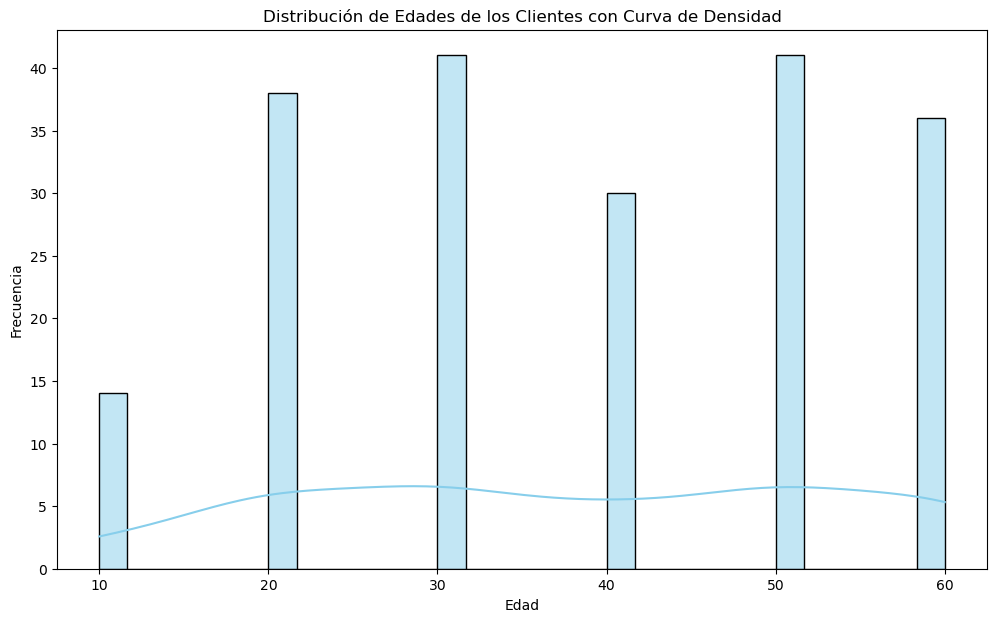

In [10]:
# Visualización 1: Distribución de las edades con curva de densidad
plt.figure(figsize=(12, 7))
ax = sns.histplot(data['edad'],
                  kde=True,
                  color='skyblue',
                  bins=30)
ax.set(title='Distribución de Edades de los Clientes con Curva de Densidad',
       xlabel='Edad',
       ylabel='Frecuencia');

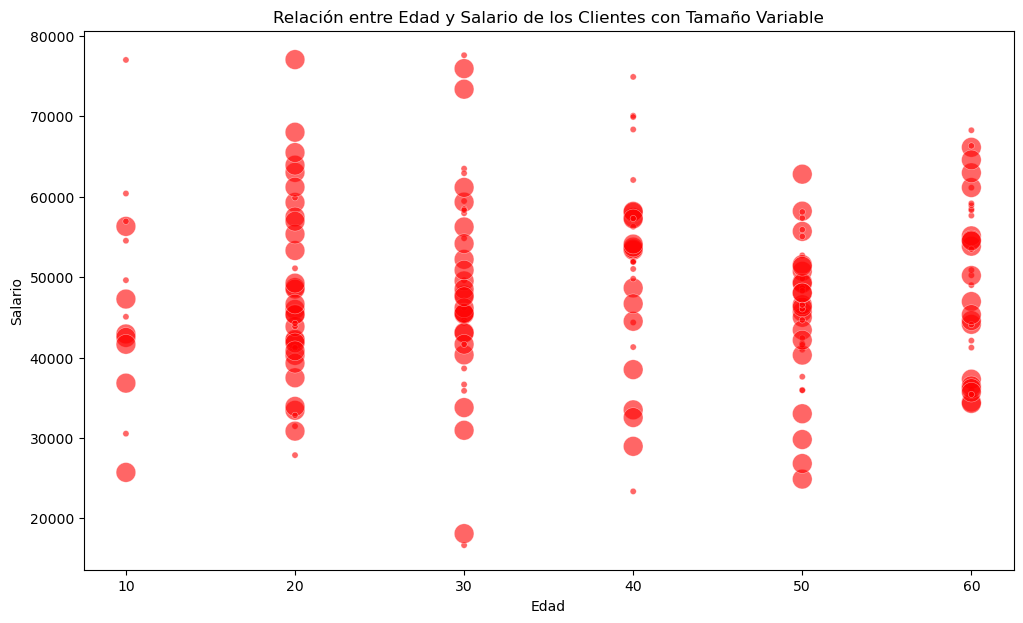

In [11]:
# Visualización 2: Relación entre Edad y Salario con tamaño variable
plt.figure(figsize=(12, 7))
sizes = data['categoria'].replace({0: 50, 1: 100})  # Asignar tamaño según categoría para ilustrar
scatter = sns.scatterplot(x='edad',
                          y='salario',
                          size=sizes,
                          legend=False,
                          sizes=(20, 200),
                          data=data,
                          color='red',
                          alpha=0.6)
scatter.set(title='Relación entre Edad y Salario de los Clientes con Tamaño Variable',
            xlabel='Edad',
            ylabel='Salario');

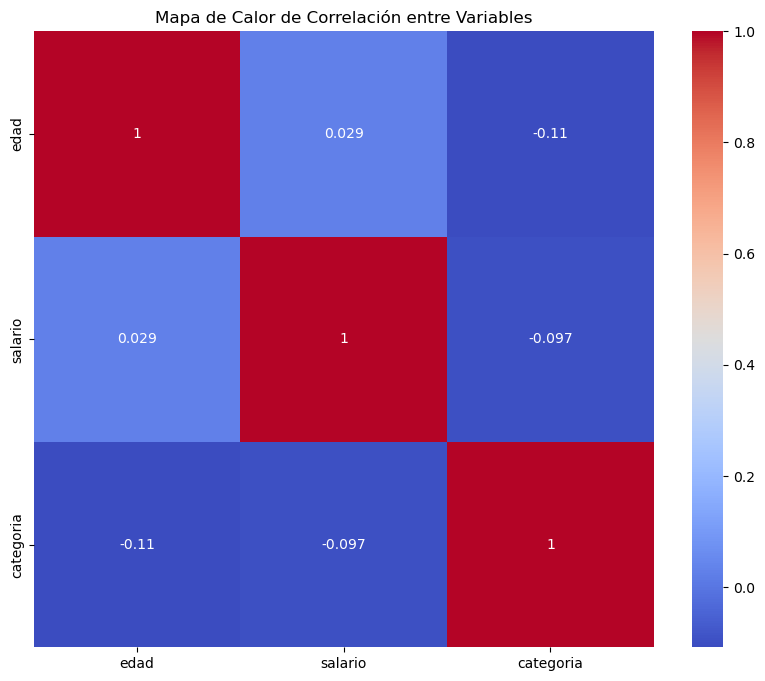

In [12]:
# Visualización 3: Mapa de Calor de Correlación entre Variables
plt.figure(figsize=(10, 8))
# Calculamos la matriz de correlación
correlation_matrix = data[['edad', 'salario', 'categoria']].corr()
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm')
heatmap.set(title='Mapa de Calor de Correlación entre Variables');